In [1]:
import logging
import tempfile

import build123d as bd
from IPython.display import Image

import stellarmesh as sm

/home/alex/micromamba/envs/stellarmesh/lib/python3.12/site-packages/pymoab/__init__.py:21: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import get_distribution, DistributionNotFound


In [2]:
logging.basicConfig()
logging.getLogger("stellarmesh").setLevel(logging.INFO)
logger = logging.getLogger(__name__)
logger.setLevel(logging.DEBUG)

In [3]:
def render_mesh(mesh: sm.Mesh):
    with tempfile.NamedTemporaryFile(suffix=".png", delete=False) as tmp_file:
        mesh.render(tmp_file.name, rotation_xyz=(90, 0, -90), normals=0, clipping=True)
        display(Image(tmp_file.name, width=800))

In [4]:
def build_torus_geometry():
    solids = [bd.Solid.make_torus(10, 1)]
    for _ in range(2):
        solids.append(bd.thicken(solids[-1].faces()[0], 1))
    solids = solids[1:]
    return sm.Geometry(solids, material_names=["a", "b"])

# Volume meshing

INFO:stellarmesh.geometry:Importing 2 solids to geometry


Info    : Meshing 1D...
Info    : [  0%] Meshing curve 1 (Circle)
Info    : [ 20%] Meshing curve 2 (Circle)
Info    : [ 40%] Meshing curve 3 (Circle)
Info    : [ 60%] Meshing curve 4 (Circle)
Info    : [ 70%] Meshing curve 5 (Circle)
Info    : [ 90%] Meshing curve 6 (Circle)
Info    : Done meshing 1D (Wall 0.000396029s, CPU 0.000641s)
Info    : Meshing 2D...
Info    : [  0%] Meshing surface 1 (Torus, MeshAdapt)
Info    : [ 40%] Meshing surface 2 (Torus, MeshAdapt)
Info    : [ 70%] Meshing surface 3 (Torus, MeshAdapt)
Info    : Done meshing 2D (Wall 0.582938s, CPU 0.629713s)
Info    : Meshing 3D...
Info    : 3D Meshing 2 volumes with 1 connected component
Info    : Tetrahedrizing 3225 nodes...
Info    : Done tetrahedrizing 3233 nodes (Wall 0.0288606s, CPU 0.024197s)
Info    : Reconstructing mesh...
Info    :  - Creating surface mesh
Info    :  - Identifying boundary edges
Info    :  - Recovering boundary
Info    : Done reconstructing mesh (Wall 0.0698886s, CPU 0.069602s)
Info    : Found

X_ChangeProperty: BadValue (integer parameter out of range for operation) 0x0


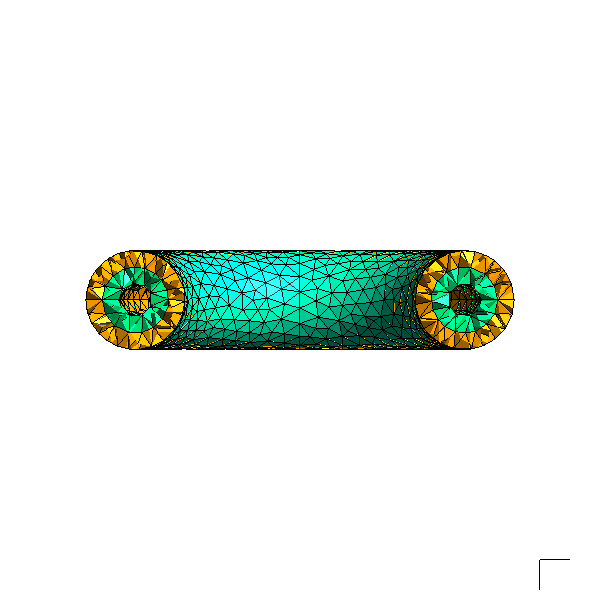

In [5]:
geometry = build_torus_geometry()
options = sm.GmshVolumeOptions(max_mesh_size=1)
mesh = sm.VolumeMesh.from_geometry(geometry, options)
render_mesh(mesh)

We can again use all the same mesh parameters as for surface meshing.

INFO:stellarmesh.geometry:Importing 2 solids to geometry


Info    : Meshing 1D...
Info    : [  0%] Meshing curve 1 (Circle)
Info    : [ 20%] Meshing curve 2 (Circle)
Info    : [ 40%] Meshing curve 3 (Circle)
Info    : [ 60%] Meshing curve 4 (Circle)
Info    : [ 70%] Meshing curve 5 (Circle)
Info    : [ 90%] Meshing curve 6 (Circle)
Info    : Done meshing 1D (Wall 0.000603832s, CPU 0.001099s)
Info    : Meshing 2D...
Info    : [  0%] Meshing surface 1 (Torus, MeshAdapt)


Info    : [ 40%] Meshing surface 2 (Torus, MeshAdapt)
Info    : [ 70%] Meshing surface 3 (Torus, MeshAdapt)
Info    : Done meshing 2D (Wall 0.764098s, CPU 0.835995s)
Info    : Meshing 3D...
Info    : 3D Meshing 2 volumes with 1 connected component
Info    : Tetrahedrizing 2441 nodes...
Info    : Done tetrahedrizing 2449 nodes (Wall 0.0234482s, CPU 0.020996s)
Info    : Reconstructing mesh...
Info    :  - Creating surface mesh
Info    :  - Identifying boundary edges
Info    :  - Recovering boundary
Info    : Done reconstructing mesh (Wall 0.0443563s, CPU 0.038907s)
Info    : Found void region
Info    : Found volume 1
Info    : Found volume 2
Info    : It. 0 - 0 nodes created - worst tet radius 1.46838 (nodes removed 0 0)
Info    : 3D refinement terminated (2444 nodes total):
Info    :  - 0 Delaunay cavities modified for star shapeness
Info    :  - 5 nodes could not be inserted
Info    :  - 9843 tetrahedra created in 0.00321705 sec. (3059639 tets/s)
Info    : 0 node relocations
Info    : 

X_ChangeProperty: BadValue (integer parameter out of range for operation) 0x0


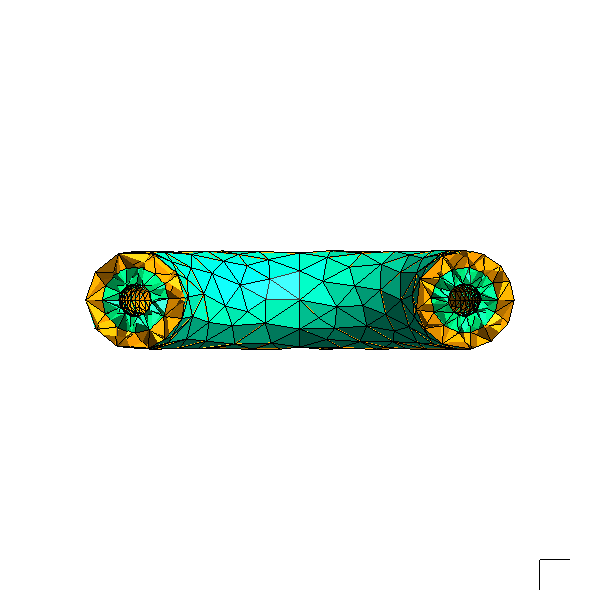

In [6]:
geometry = build_torus_geometry()
options = sm.GmshVolumeOptions(curvature_target=10)
mesh = sm.VolumeMesh.from_geometry(geometry, options)
render_mesh(mesh)

As for surface meshing with Gmsh, we can select from a number of surface and volume meshing algorithms. For reference see the Gmsh documentation.

INFO:stellarmesh.geometry:Importing 2 solids to geometry


Info    : Meshing 1D...
Info    : [  0%] Meshing curve 1 (Circle)
Info    : [ 20%] Meshing curve 2 (Circle)
Info    : [ 40%] Meshing curve 3 (Circle)
Info    : [ 60%] Meshing curve 4 (Circle)
Info    : [ 70%] Meshing curve 5 (Circle)
Info    : [ 90%] Meshing curve 6 (Circle)
Info    : Done meshing 1D (Wall 0.000712775s, CPU 0.000989s)
Info    : Meshing 2D...
Info    : [  0%] Meshing surface 1 (Torus, MeshAdapt)
Info    : [ 40%] Meshing surface 2 (Torus, MeshAdapt)
Info    : [ 70%] Meshing surface 3 (Torus, MeshAdapt)
Info    : Done meshing 2D (Wall 2.06877s, CPU 2.25527s)
Info    : Meshing 3D...
Info    : Meshing volume 1 (Frontal)
Info    : Region 1 Face 1, 3 intersect
Info    : Region 1 Face 2, 2 intersect
Info    : CalcLocalH: 4513 Points 0 Elements 9026 Surface Elements 
Info    : Check subdomain 1 / 1 
Info    : 9026 open elements 
Info    : Meshing subdomain 1 of 1 
Info    : 9026 open elements 
Info    : Use internal rules 
Info    : 9026 open elements 
Info    : Delaunay meshin

X_ChangeProperty: BadValue (integer parameter out of range for operation) 0x0


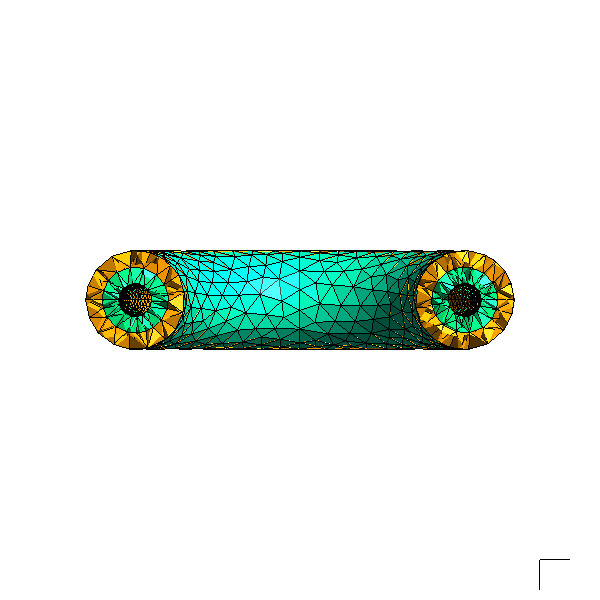

In [9]:
geometry = build_torus_geometry()
options = sm.GmshVolumeOptions(
    curvature_target=15,
    algorithm2d=sm.GmshSurfaceAlgo.MESH_ADAPT,
    algorithm3d=sm.GmshVolumeAlgo.FRONTAL,
)
mesh = sm.VolumeMesh.from_geometry(geometry, options)
render_mesh(mesh)

# MOAB and EXODUS export

In [10]:
# MOAB export
sm.MOABModel.from_mesh(mesh).write("torus3d.h5m")

# EXODUS export
mesh.write("torus3d.exo")

Info    : Reading '/tmp/tmpzsgdbdfb.msh'...
Info    : 14 entities
Info    : 5808 nodes
Info    : 34531 elements
Info    : Done reading '/tmp/tmpzsgdbdfb.msh'
Info    : Writing '/tmp/tmpb375y5xh.vtk'...
Info    : Done writing '/tmp/tmpb375y5xh.vtk'
Info    : Reading '/tmp/tmpzsgdbdfb.msh'...
Info    : 14 entities
Info    : 5808 nodes
Info    : 34531 elements
Info    : Done reading '/tmp/tmpzsgdbdfb.msh'
Info    : Writing 'torus3d.exo'...
Info    : Writing '/tmp/tmpuwr18wsn.msh'...
Info    : Done writing '/tmp/tmpuwr18wsn.msh'



Error   : Unknown output file format
